In [59]:
import matplotlib.pyplot as plt

from phase_portrait import *
import yfinance as yf
import numpy as np
%matplotlib inline

In [100]:
data_nas = yf.download("^IXIC", "2018-01-01","2021-01-01")
data_nas['date'] = data_nas.index
data_nas['value'] =  data_nas[['Adj Close']]
data_nas = data_nas.reset_index(drop=True)
data_nas = data_nas[['date', 'value']]

[*********************100%***********************]  1 of 1 completed


In [63]:
data_nas

,date,value
0,2018-01-02,7006.899902
1,2018-01-03,7065.529785
2,2018-01-04,7077.910156
3,2018-01-05,7136.560059
4,2018-01-08,7157.390137
...,...,...
751,2020-12-24,12804.730469
752,2020-12-28,12899.419922
753,2020-12-29,12850.219727
754,2020-12-30,12870.000000


In [101]:
data_nas_30 = slice_data(data_nas, slice_period=30, reset_index=False)
x_30 = data_nas_30.index
y_30 = data_nas_30['value']
x_1 = data_nas.index
y_1 = data_nas['value']

In [102]:
spline = CubicSpline(x_30, y_30, bc_type='clamped')

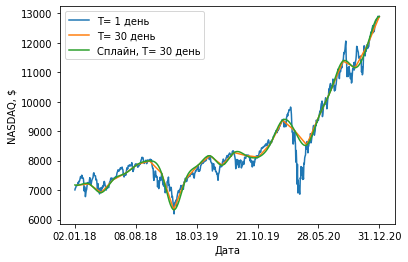

In [106]:
fig, ax = plt.subplots()
xx, deriv = get_phase_portrait(x_30, y_30, deriv_num=2)
tt = np.linspace(x_1[0], x_1[-1], num=deriv[0].shape[0])
ax.plot(x_1, y_1,  label='T= 1 день')
ax.plot(x_30, y_30, label='T= 30 день')
# ax.plot(tt, deriv[0],'--', label='deriv')
ax.plot(x_1, spline(x_1), label='Сплайн, T= 30 день')
ax.set_ylabel('NASDAQ, $')
ax.set_xlabel('Дата')
ticks_num=6
ax.set_xticks(ticks=get_ticks(x_1, ticks_num), labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))
ax.legend();
plt.savefig(f"Spline_example_nasdaq.png", dpi=200)
plt.show()

In [85]:
# plt.xticks(ticks=get_ticks(snp_phases[2][2], ticks_num), labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))

[Timestamp('2018-01-02 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2019-01-03 00:00:00'),
 Timestamp('2019-07-05 00:00:00'),
 Timestamp('2020-01-02 00:00:00'),
 Timestamp('2020-07-02 00:00:00'),
 Timestamp('2020-12-31 00:00:00')]